# Домашнее задание № 8

<pre>
ФИО: Никифоров Владимир
</pre>

In [6]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
from datetime import datetime
import yaml

import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
raw = pd.read_csv('../data/tmdb_5000_movies.csv').dropna()
raw.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [79]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [139]:
df = raw[['runtime','release_date','budget','vote_average','genres']]
# Leave Year only from 'release_date'
df['release_date'] = df.apply(lambda x: datetime.strptime(x['release_date'], '%Y-%m-%d').year if type(x['release_date']) == str else 1900, axis=1).astype('int64')
# Drop unusefull rows as outliers
df = df[(df['release_date']>1900) & (df['genres'] != '[]') & (df['runtime']>0) & (df['budget']>0) & (df['vote_average']>0) & (df['budget']<3e8)]
# Get First Genre from genres as TOP1 for each film
df['top_genre'] = df.apply(lambda x: [g['name'] for g in yaml.load(x['genres'])][0], axis=1)
df = df[['runtime','release_date','budget','vote_average','top_genre']]
df.head()

/home/truename/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,runtime,release_date,budget,vote_average,top_genre
0,162.0,2009,237000000,7.2,Action
2,148.0,2015,245000000,6.3,Action
3,165.0,2012,250000000,7.6,Action
4,132.0,2012,260000000,6.1,Action
5,139.0,2007,258000000,5.9,Fantasy


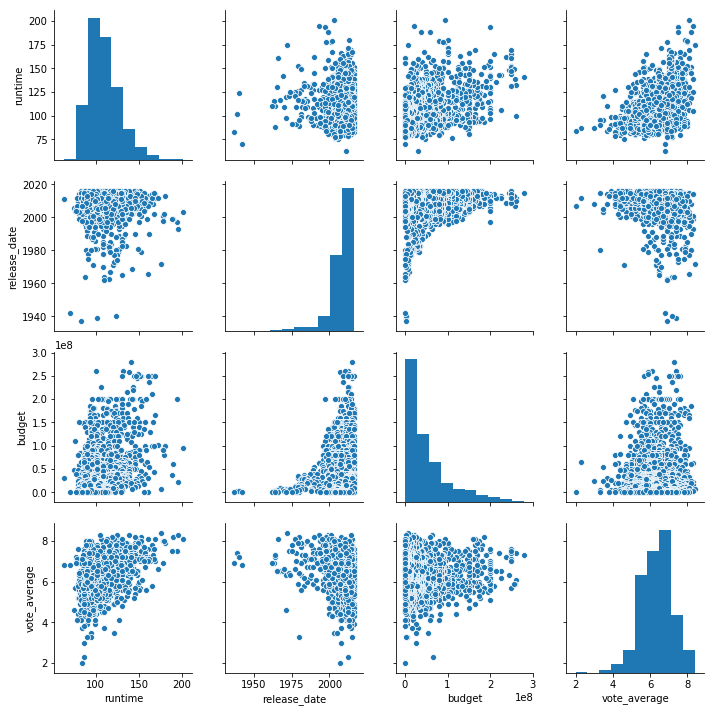

In [140]:
sns.pairplot(df[['runtime','release_date','budget','vote_average']]);

In [146]:
df.groupby('top_genre')[['vote_average']].median().style.bar()

,vote_average
top_genre,
Action,6.2
Adventure,6.5
Animation,6.5
Comedy,6
Crime,6.5
Documentary,6.95
Drama,6.8
Family,6.3
Fantasy,6.2


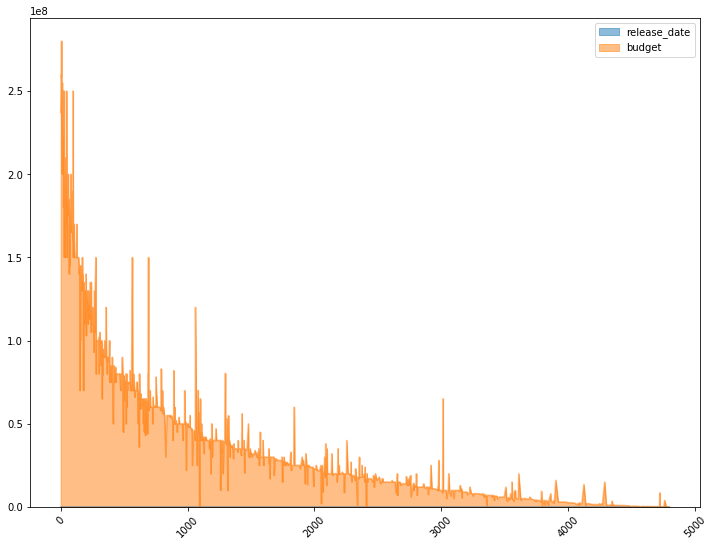

In [149]:
df[['release_date','budget']].plot(kind='area', rot=45, stacked=False);

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

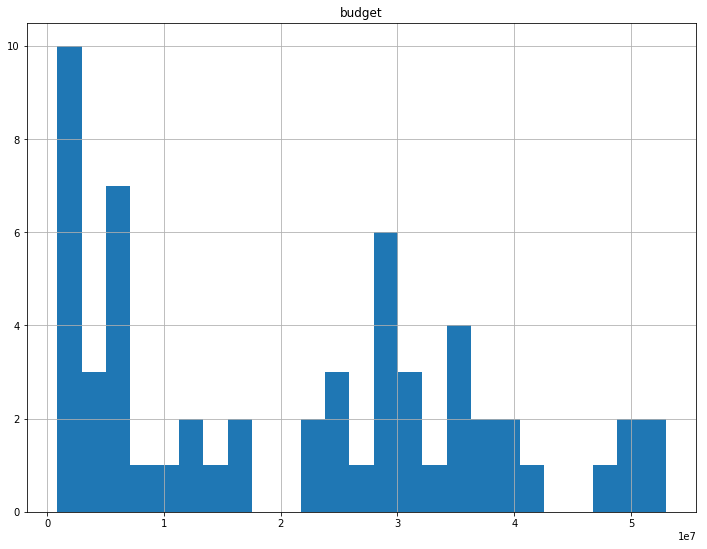

In [147]:
ax = df.groupby('release_date')[['budget']].median().hist(bins = 25)
ax.set_title('Budget by Release Year distribution')
ax.set_xlabel('year')
ax.set_ylabel('budget')

In [ ]:
platform_genre_sales = df.pivot_table(
                        index='top_genre', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)

platform_genre_sales

In [82]:
df1 = df.groupby('release_date').median()
df1.head()

,popularity,runtime,budget,vote_average
release_date,,,,
1916,3.232447,197.0,385907.0,7.4
1925,0.785744,151.0,245000.0,7.0
1927,32.351527,153.0,92620000.0,8.0
1929,1.396524,104.5,189500.0,6.3
1930,8.484123,127.0,3950000.0,6.1


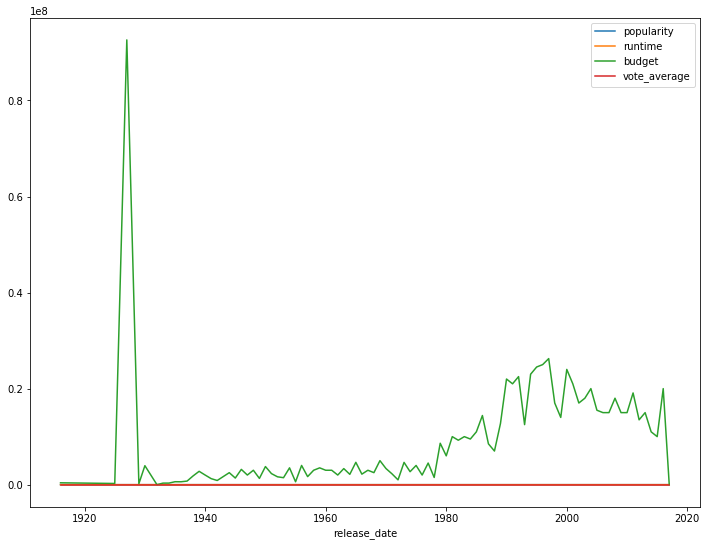

In [83]:
df1.plot()

In [84]:
plt.barh(names_barh['Name'], names_barh['Count'])
plt.xlabel('Quantity')
plt.ylabel('Names')
plt.title('Top 15 most common women names')
plt.grid()
plt.text(20000, 0.5, 'Most common name')

NameError: name 'names_barh' is not defined

In [ ]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))]\
    .plot(kind='area', rot=45, stacked=False);

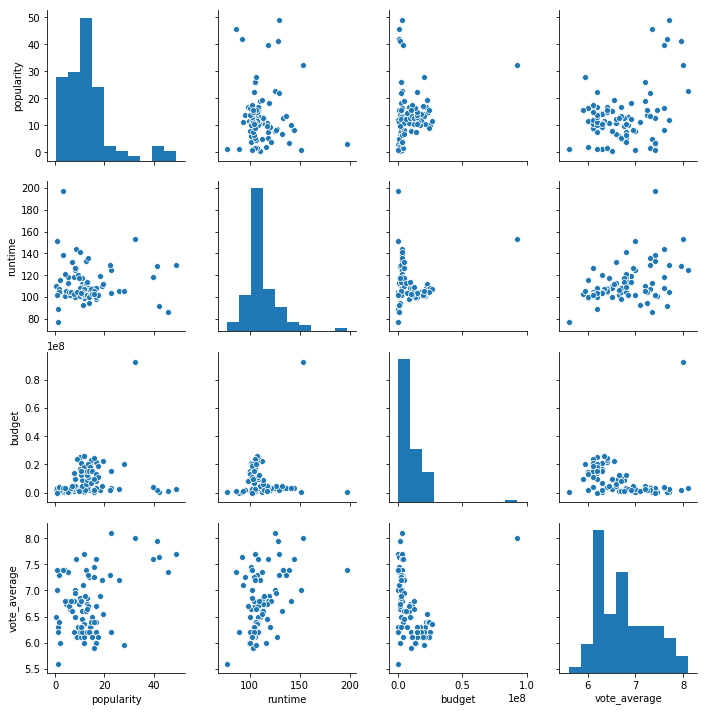

In [85]:
sns_plot = sns.pairplot(df1);
sns_plot

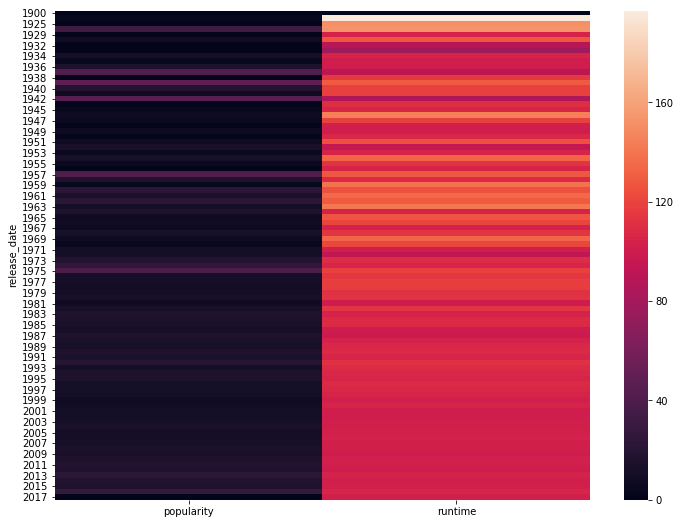

In [54]:
sns.heatmap(df1, annot=False)

In [ ]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [ ]:
trace0 = go.Scatter(
    x=genres_df.Critic_Score,
    y=genres_df.User_Score,
    mode = 'markers'
)

data = [trace0]
layout = {'title': 'Statistics of video games genres', 'yaxis': {'title': 'user score'}, 
          'xaxis': {'title': 'critic score'}}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)